## Model Comparison
In this notebook, I will compare the result of Random Forest and XGBoost

### Random Forest
Let's start with Random Forest

In [1]:
import pandas as pd

ticker = "AAPL"
data = pd.read_csv(f"data/modeling/{ticker}_model_data.csv", index_col="Date", parse_dates=True)

In [2]:
X = data.drop(columns=["Target"])
y = data["Target"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=False, test_size=0.2
)

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [4]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[106  33]
 [126  34]]
              precision    recall  f1-score   support

           0       0.46      0.76      0.57       139
           1       0.51      0.21      0.30       160

    accuracy                           0.47       299
   macro avg       0.48      0.49      0.44       299
weighted avg       0.48      0.47      0.43       299



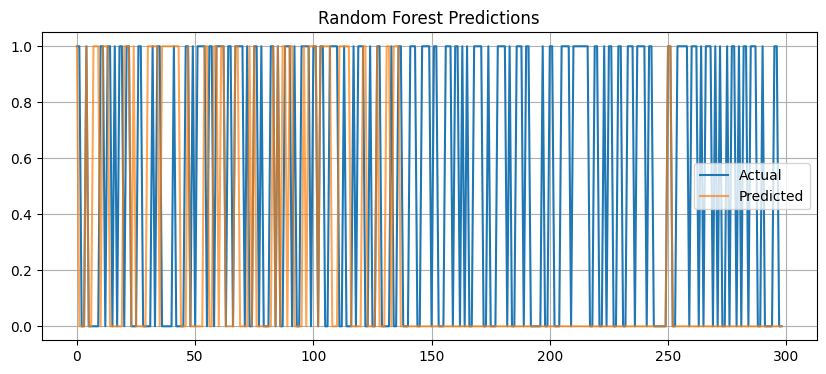

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.title("Random Forest Predictions")
plt.legend()
plt.grid()
plt.show()

In [6]:
print(y_train.value_counts())
print(y_test.value_counts())

Target
1    637
0    559
Name: count, dtype: int64
Target
1    160
0    139
Name: count, dtype: int64


In [7]:
import pandas as pd

pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

RSI_14           0.205837
Momentum_5       0.205232
Volatility_10    0.201841
Close            0.196055
MA_10            0.191035
dtype: float64

### XGBoost
Now, let's try XGBoost

In [8]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [9]:
xgb.fit(X_train, y_train)

/Users/tan/miniconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [17:29:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [10]:
y_pred = xgb.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 96  43]
 [114  46]]
              precision    recall  f1-score   support

           0       0.46      0.69      0.55       139
           1       0.52      0.29      0.37       160

    accuracy                           0.47       299
   macro avg       0.49      0.49      0.46       299
weighted avg       0.49      0.47      0.45       299



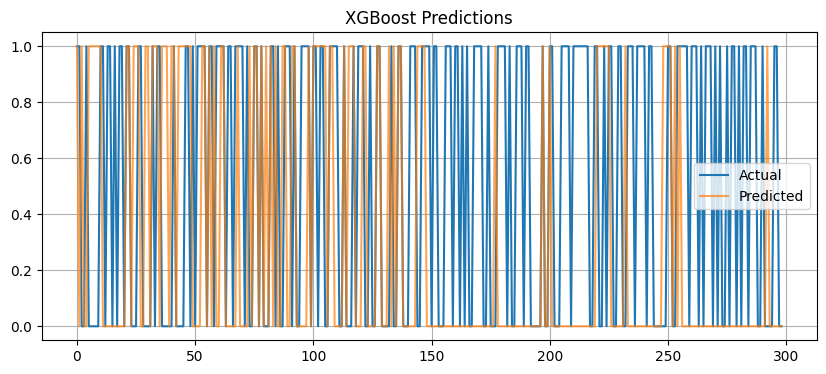

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.title("XGBoost Predictions")
plt.legend()
plt.grid()
plt.show()